In [19]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

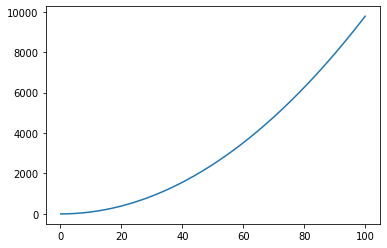

In [77]:
n = 100
Teta = np.arange(0.1,100,0.1)
F = []
for teta in Teta:
    x = scipy.stats.expon.rvs(teta,size=n)
    m = x.mean()
    F.append(teta**2 / ((n-1)*(n-2)) - 2 * teta**2 / (n-1) + teta**2 )
plt.plot(Teta,F)
plt.show()

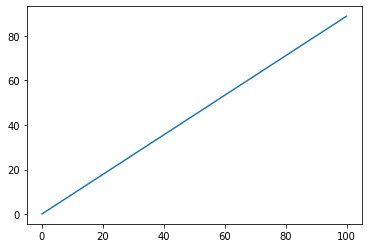

In [78]:
def f(x,teta,n):
    return abs(1./x - teta) * x **(n-1) * math.exp(-teta*x) * teta**n / (math.factorial(n-1))
n = 10
Teta = np.arange(0.1,100,0.1)
F = []
for teta in Teta:
    x = scipy.stats.expon.rvs(teta,size=n)
    m = x.mean()
    I = scipy.integrate.quad(f,0,np.inf,args=(teta,n))
    F.append(max(I))
plt.plot(Teta,F)
plt.show()

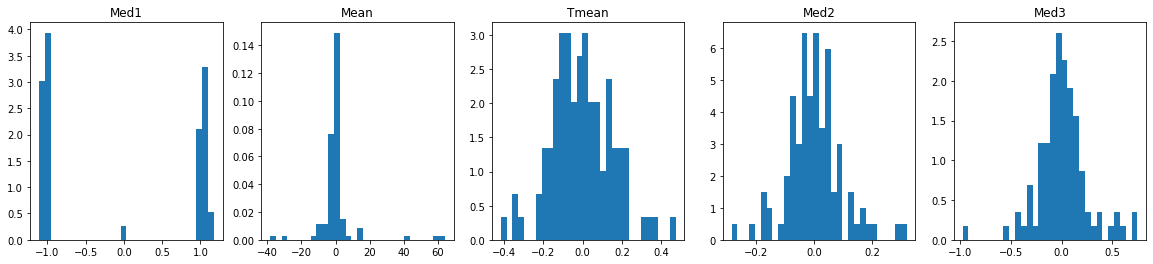

In [115]:
def G(x):
    if x <= 1/2:
        return -1/(2*x)
    else:
        return -1/(2*(x-1))
n = 500
k = 100
Med1 = []
Med2 = []
Med3 = []
Mean = []
Tmean = []

for i in range(k):
    x = scipy.stats.uniform.rvs(size=n)
    y = np.array([G(t) for t in x])
    mean = np.mean(y)
    Mean.append(mean)
    tmean = scipy.stats.trim_mean(y,0.25)
    Tmean.append(tmean)
    z = []
    for u in range(n):
        for v in range(u):
            z.append((y[u]+y[v])/2)
    med2 = np.median(z)
    Med2.append(med2)
    y = np.sort(y)
    med1 = np.median(y)
    Med1.append(med1)
    w = np.array([y[j]+y[n-1-j] for j in range(round(n/2)+1)])
    med3 = np.median(w)
    Med3.append(med3)
fig, ax = plt.subplots(1,5,figsize = (20,4))
bins = 30
ax[0].hist(Med1,density=True,bins=bins)
ax[0].set_title('Med1')
ax[1].hist(Mean,density=True,bins=bins)
ax[1].set_title('Mean')
ax[2].hist(Tmean,density=True,bins=bins)
ax[2].set_title('Tmean')
ax[3].hist(Med2,density=True,bins=bins)
ax[3].set_title('Med2')
ax[4].hist(Med3,density=True,bins=bins)
ax[4].set_title('Med3')
plt.show()